### Importing fixed data from the Project.ipynb

In [1]:
%store -r data

In [2]:
data

,start_date,start_time,end_date,end_time,start_station,end_station,length,dataset,duration,gender,age
0,2019-06-02,11:56:01,2019-06-02,11:58:37,WH,WH,0.00,1,156,0,35.0
1,2019-06-02,17:41:53,2019-06-02,17:43:10,WH,WH,0.06,1,77,0,35.0
2,2019-06-03,11:19:48,2019-06-03,12:30:41,WH,WH,0.00,1,4253,0,35.0
3,2019-06-03,12:47:10,2019-06-03,12:53:28,55.0,55.0,0.96,1,378,NaN,NaN
4,2019-06-03,12:52:33,2019-06-03,12:54:08,55.0,55.0,0.01,1,95,1,27.0
...,...,...,...,...,...,...,...,...,...,...,...
1701590,2021-04-30,23:52:51,2021-05-01,00:28:09,1.0,1.0,6.82,3,2118,1,19.0
1701591,2021-04-30,23:53:50,2021-05-01,00:15:46,78.0,13.0,6.69,3,1316,1,48.0
1701592,2021-04-30,23:53:53,2021-04-30,23:58:42,1.0,11.0,1.22,3,289,0,81.0
1701593,2021-04-30,23:54:30,2021-05-01,00:02:03,11.0,34.0,2.35,3,453,NaN,NaN


In [3]:
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
print(data.columns)
print()
print(data.shape)

Index(['start_date', 'start_time', 'end_date', 'end_time', 'start_station',
       'end_station', 'length', 'dataset', 'duration', 'gender', 'age'],
      dtype='object')

(1701595, 11)


In [5]:
data.describe()

,length,dataset,duration,age
count,1.701595e+06,1.701595e+06,1.701595e+06,1.305546e+06
mean,2.661344e+00,1.613566e+00,1.141141e+03,2.938831e+01
std,2.394304e+00,5.805291e-01,4.006346e+03,1.344413e+01
min,0.000000e+00,1.000000e+00,3.000000e+01,-6.000000e+01
25%,1.030000e+00,1.000000e+00,3.580000e+02,2.000000e+01
50%,2.030000e+00,2.000000e+00,6.750000e+02,2.500000e+01
75%,3.590000e+00,2.000000e+00,1.368000e+03,3.500000e+01
max,1.618300e+02,3.000000e+00,1.370228e+06,2.210000e+02


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1701595 entries, 0 to 1701594
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   start_date     object 
 1   start_time     object 
 2   end_date       object 
 3   end_time       object 
 4   start_station  object 
 5   end_station    object 
 6   length         float64
 7   dataset        int64  
 8   duration       int32  
 9   gender         object 
 10  age            float64
dtypes: float64(2), int32(1), int64(1), object(7)
memory usage: 136.3+ MB


In [7]:
#NaN values
data.isnull().sum()

start_date            0
start_time            0
end_date              0
end_time              0
start_station     78777
end_station       78661
length                0
dataset               0
duration              0
gender           396049
age              396049
dtype: int64

### Preping data from modeling

In [15]:
from datetime import datetime

just_testing = data.copy()

# Replacing NaN values in age column
print('Age median to fill NaN values: ' + str(just_testing['age'].median()))
just_testing['age'] = just_testing['age'].fillna(just_testing['age'].median())

# Dropping NaN values in start_station and end_station columns
##just_testing.dropna(subset=['start_station'], inplace=True)
##just_testing.dropna(subset=['end_station'], inplace=True)

# Dropping rides that started or ended in warehouse
##just_testing = just_testing[(just_testing.start_station != 'WH') & (just_testing.end_station != 'WH')]      
      
# Converting column start_date values to datetime format    
just_testing['start_date'] = pd.to_datetime(just_testing['start_date'])
#just_testing['start_date'] = just_testing['start_date'].dt.strftime("%Y%m%d").astype(int)

#just_testing['start_time'] = pd.to_datetime(just_testing['start_time'])
#just_testing['start_time'] = just_testing['start_time'].dt.strftime("%H%M%S").astype(int)

# Converting column end_date values to datetime format 
just_testing['end_date'] = pd.to_datetime(just_testing['end_date'])
#just_testing['end_date'] = just_testing['end_date'].dt.strftime("%Y%m%d").astype(int)

#just_testing['end_time'] = pd.to_datetime(just_testing['end_time'])
#just_testing['end_time'] = just_testing['end_time'].dt.strftime("%H%M%S").astype(int)

# Converting floats in columns age, start_station and end_station to integers
just_testing['age'] = just_testing['age'].astype(int)
##just_testing['start_station'] = just_testing['start_station'].astype(int)
##just_testing['end_station'] = just_testing['end_station'].astype(int)


Age median to fill NaN values: 25.0


In [16]:
just_testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1701595 entries, 0 to 1701594
Data columns (total 11 columns):
 #   Column         Dtype         
---  ------         -----         
 0   start_date     datetime64[ns]
 1   start_time     object        
 2   end_date       datetime64[ns]
 3   end_time       object        
 4   start_station  object        
 5   end_station    object        
 6   length         float64       
 7   dataset        int64         
 8   duration       int32         
 9   gender         object        
 10  age            int32         
dtypes: datetime64[ns](2), float64(1), int32(2), int64(1), object(5)
memory usage: 129.8+ MB


In [21]:
just_testing

,start_date,start_time,end_date,end_time,start_station,end_station,length,dataset,duration,age
0,2019-06-02,11:56:01,2019-06-02,11:58:37,WH,WH,0.00,1,156,35
1,2019-06-02,17:41:53,2019-06-02,17:43:10,WH,WH,0.06,1,77,35
2,2019-06-03,11:19:48,2019-06-03,12:30:41,WH,WH,0.00,1,4253,35
3,2019-06-03,12:47:10,2019-06-03,12:53:28,55.0,55.0,0.96,1,378,25
4,2019-06-03,12:52:33,2019-06-03,12:54:08,55.0,55.0,0.01,1,95,27
...,...,...,...,...,...,...,...,...,...,...
1701590,2021-04-30,23:52:51,2021-05-01,00:28:09,1.0,1.0,6.82,3,2118,19
1701591,2021-04-30,23:53:50,2021-05-01,00:15:46,78.0,13.0,6.69,3,1316,48
1701592,2021-04-30,23:53:53,2021-04-30,23:58:42,1.0,11.0,1.22,3,289,81
1701593,2021-04-30,23:54:30,2021-05-01,00:02:03,11.0,34.0,2.35,3,453,25


In [20]:
# finalizing data
just_testing = just_testing.reset_index()
just_testing = just_testing.drop(['index', 'gender'], axis=1)

In [24]:
proov = just_testing.copy()

proov['ride_count'] = 1
proov = proov.groupby(by=['start_date'], as_index=False).sum()

In [25]:
proov

,start_date,length,dataset,duration,age,ride_count
0,2019-06-02,0.06,2,233,70,2
1,2019-06-03,68.78,15,31805,387,15
2,2019-06-06,27.47,8,9542,204,8
3,2019-06-08,33127.79,9006,14359645,255529,9006
4,2019-06-09,46545.69,15727,20043807,432073,15727
...,...,...,...,...,...,...
691,2021-04-26,4021.32,4674,1421463,45832,1558
692,2021-04-27,5306.45,5979,1926050,57061,1993
693,2021-04-28,7036.27,7572,2704697,71858,2524
694,2021-04-29,8434.18,8610,3402544,80330,2870


### Adding columns with additional data

In [26]:
import datetime

proov = proov.drop(['dataset', 'age'], axis=1)
proov['year'] = pd.DatetimeIndex(proov['start_date']).year
proov['month'] = pd.DatetimeIndex(proov['start_date']).month
proov['day'] = pd.DatetimeIndex(proov['start_date']).day
proov['day_of_week'] = pd.DatetimeIndex(proov['start_date']).dayofweek

proov

,start_date,length,duration,ride_count,year,month,day,day_of_week
0,2019-06-02,0.06,233,2,2019,6,2,6
1,2019-06-03,68.78,31805,15,2019,6,3,0
2,2019-06-06,27.47,9542,8,2019,6,6,3
3,2019-06-08,33127.79,14359645,9006,2019,6,8,5
4,2019-06-09,46545.69,20043807,15727,2019,6,9,6
...,...,...,...,...,...,...,...,...
691,2021-04-26,4021.32,1421463,1558,2021,4,26,0
692,2021-04-27,5306.45,1926050,1993,2021,4,27,1
693,2021-04-28,7036.27,2704697,2524,2021,4,28,2
694,2021-04-29,8434.18,3402544,2870,2021,4,29,3


### Adding weather data 

In [27]:
# See more in Weather_data.ipynb
%store -r loplik

In [28]:
loplik

,Kuupaev,Temperatuur,Niiskus,Andmeid_paeva_kohta
0,2019-06-01,14,53,276
1,2019-06-02,14,69,288
2,2019-06-03,14,57,288
3,2019-06-04,21,49,288
4,2019-06-05,24,49,288
...,...,...,...,...
695,2021-04-26,3,87,288
696,2021-04-27,4,89,288
697,2021-04-28,4,71,288
698,2021-04-29,5,70,288


In [29]:
loplik = loplik.rename(columns={"Kuupaev": "start_date"})

In [30]:
import pandas as pd

mudelile = pd.merge(proov, loplik, on='start_date')

In [31]:
mudelile

,start_date,length,duration,ride_count,year,month,day,day_of_week,Temperatuur,Niiskus,Andmeid_paeva_kohta
0,2019-06-02,0.06,233,2,2019,6,2,6,14,69,288
1,2019-06-03,68.78,31805,15,2019,6,3,0,14,57,288
2,2019-06-06,27.47,9542,8,2019,6,6,3,24,58,288
3,2019-06-08,33127.79,14359645,9006,2019,6,8,5,25,55,288
4,2019-06-09,46545.69,20043807,15727,2019,6,9,6,20,68,288
...,...,...,...,...,...,...,...,...,...,...,...
691,2021-04-26,4021.32,1421463,1558,2021,4,26,0,3,87,288
692,2021-04-27,5306.45,1926050,1993,2021,4,27,1,4,89,288
693,2021-04-28,7036.27,2704697,2524,2021,4,28,2,4,71,288
694,2021-04-29,8434.18,3402544,2870,2021,4,29,3,5,70,288


In [32]:
mudelile.isnull().sum()

start_date             0
length                 0
duration               0
ride_count             0
year                   0
month                  0
day                    0
day_of_week            0
Temperatuur            0
Niiskus                0
Andmeid_paeva_kohta    0
dtype: int64

In [33]:
mudelile = mudelile.iloc[5: , :]

In [34]:
mudelile = mudelile[mudelile['ride_count'] >= 50]

In [35]:
mudelile

,start_date,length,duration,ride_count,year,month,day,day_of_week,Temperatuur,Niiskus,Andmeid_paeva_kohta
5,2019-06-10,46294.14,20302215,17224,2019,6,10,0,17,59,288
6,2019-06-11,30833.62,13669344,11520,2019,6,11,1,17,70,288
7,2019-06-12,39121.75,17187867,14277,2019,6,12,2,18,71,288
8,2019-06-13,25505.40,11798783,9137,2019,6,13,3,18,77,288
9,2019-06-14,30490.62,12968343,10759,2019,6,14,4,18,89,288
...,...,...,...,...,...,...,...,...,...,...,...
691,2021-04-26,4021.32,1421463,1558,2021,4,26,0,3,87,288
692,2021-04-27,5306.45,1926050,1993,2021,4,27,1,4,89,288
693,2021-04-28,7036.27,2704697,2524,2021,4,28,2,4,71,288
694,2021-04-29,8434.18,3402544,2870,2021,4,29,3,5,70,288


### MODEL

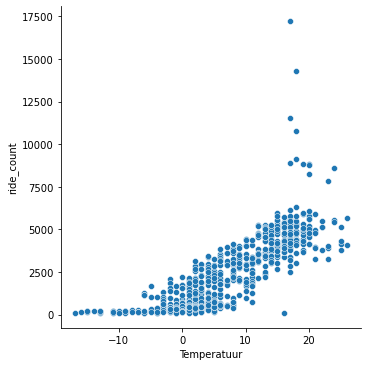

In [36]:
#visualization 
sns.relplot(x='Temperatuur', y='ride_count',data=mudelile)

In [37]:
#model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression

train = mudelile.drop(['start_date', 'ride_count', 'Andmeid_paeva_kohta', 'length', 'duration'], axis=1)
test = mudelile['ride_count']

x_train, x_test, y_train, y_test = train_test_split(train, test, test_size=0.3)

print(x_train.shape)
print(y_train.shape)

(483, 6)
(483,)


In [38]:
#from sklearn import linear_model

#clf = linear_model.Lasso(alpha=0.1)
#from sklearn import linear_model
#clf = linear_model.PoissonRegressor()
#clf.fit(train, test)
#pred = clf.predict(x_test)

#from sklearn.preprocessing import PolynomialFeatures

#poly_reg = PolynomialFeatures(degree=4)
#X_poly = poly_reg.fit_transform(train)
#pol_reg = LinearRegression()
#pol_reg.fit(X_poly, test)


#from sklearn import linear_model

#clf = linear_model.PoissonRegressor()
#clf.fit(train, test)
#pred = clf.predict(x_test)

regr = LinearRegression()
regr.fit(x_train, y_train)
pred = regr.predict(x_test)

In [39]:
import numpy
from sklearn.metrics import r2_score

r2_score(y_test, pred)

0.6992636175510225

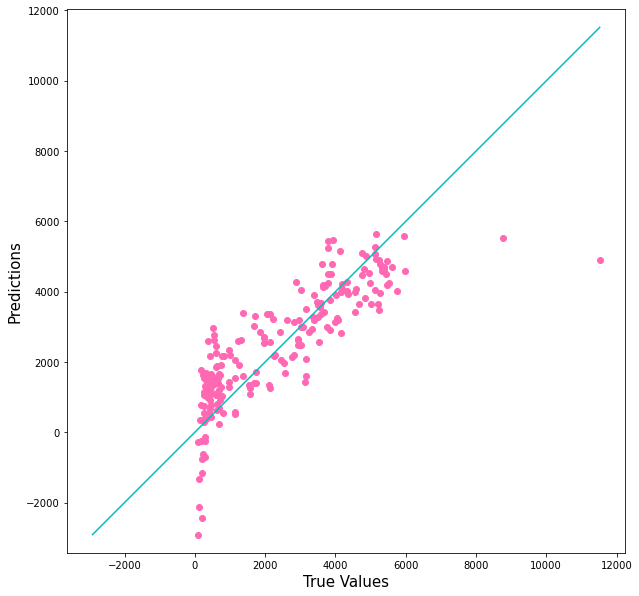

In [40]:
#visualizing predicted and true values

import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(y_test, pred, c='hotpink')

p1 = max(max(pred), max(y_test))
p2 = min(min(pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'c-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')

plt.show()

### Siit edasi pask prg

In [ ]:
#visualization

sns.relplot(x='age', y='duration',data=just_testing)

#just_testing['start_time'].apply(lambda x:x.toordinal())
#just_testing.info()
#just_testing

In [ ]:
just_testing = just_testing[(just_testing.start_station != 'WH') & (just_testing.end_station != 'WH')]
just_testing = just_testing.reset_index()
just_testing = just_testing.drop(['start_time', 'end_time'], axis=1)
just_testing

In [ ]:
just_testing = just_testing.drop(['index'], axis=1)
just_testing

In [ ]:
just_testing.dropna(subset=['start_station'], inplace=True)
just_testing.dropna(subset=['end_station'], inplace=True)

In [ ]:
just_testing = just_testing.reset_index()
just_testing = just_testing.drop(['index'], axis=1)
just_testing

In [ ]:
just_testing

In [ ]:
#model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression

suveperiood = just_testing.loc[((just_testing['start_date'] >= 20190901) & (just_testing['start_date'] <= 20190930))]

train = suveperiood.drop(['gender', 'dataset', 'length', 'duration', 'start_date', 'end_date'], axis=1)
test = suveperiood['duration']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(train, test, test_size=0.3)

In [ ]:
print(x_train.shape)
print(y_train.shape)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import metrics, svm                  
from sklearn.linear_model import LogisticRegression          
from sklearn import preprocessing
from sklearn import utils
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import numpy
import matplotlib.pyplot as plt

#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

model = RandomForestClassifier(n_estimators=10000)
# regr = LinearRegression()
#model = numpy.poly1d(numpy.polyfit(x, y, 3))


In [ ]:
#import math
#print(math.sqrt(len(y_test)))
#myline = numpy.linspace(1, 2000, 200)

In [ ]:
plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

In [ ]:
model.fit(x_train, y_train)
#regr.fit(x_train, y_train)
#classifier = KNeighborsClassifier(n_neighbors=683,p=2,metric='euclidean')
#classifier.fit(x_train,y_train)

In [ ]:
#y_pred =  classifier.predict(X_test)
#y_pred

probs = pd.DataFrame(model.predict_proba(x_test))
probs
#pred = regr.predict(x_test)
#pred

In [ ]:
cm= confusion_matrix(y_test,y_pred)
cm

In [ ]:
print(f1_score(y_test,y_pred))

In [ ]:
print(accuracy_score(y_test,y_pred))

In [ ]:
x = roc_auc_score(y_test, probs)
print(x)
#regr.score(x_test, y_test)

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, pred)
print(mae)

In [ ]:
stations_and_duration = data[['start_station', 'end_station', 'duration']]
stations_and_duration

In [ ]:
stations_and_duration = stations_and_duration.dropna()

In [ ]:
stations_and_duration = stations_and_duration[(stations_and_duration.start_station != 'WH') & (stations_and_duration.end_station != 'WH')]
stations_and_duration

In [ ]:
#stations_and_duration.dropna(subset=['start_station', 'end_station'])
print(stations_and_duration['start_station'].isna().sum())
print(stations_and_duration['end_station'].isna().sum())
print(stations_and_duration['duration'].isna().sum())

In [ ]:
stations_and_duration = stations_and_duration.reset_index()
stations_and_duration

In [ ]:
suveperiood = data.loc[((data['start_date'] >= '2019-09-01') & (data['start_date'] <= '2019-09-30')) | ((data['start_date'] >= '2020-06-01') & (data['start_date'] <= '2020-08-31'))]
suveperiood

In [ ]:
import matplotlib.pyplot as plt
from sklearn import linear_model
import pandas

x = stations_and_duration[['start_station', 'end_station']]
y = stations_and_duration['duration']

regr = linear_model.LinearRegression()
regr.fit(x, y)

In [ ]:
predicted = regr.predict([[1.0, 31.0]])

print(predicted)

In [ ]:
import numpy
import matplotlib.pyplot as plt
# numpy.random.seed(2)

X = stations_and_duration['end_station']


plt.scatter(X, y)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score

regr.fit(x_train, y_train)

print(r2_score(x_train, x_test))

In [ ]:
x = roc_auc_score(y_test, probs)
print(x)